In [1]:
%%html
<style> table {margin-left: 0 !important;} </style>

In [2]:
#
# prototype decaying species function
#
def c1dadrd(c_source,space,time,dispersion,velocity,retardation,decay):
    from math import sqrt,erf,erfc,exp  # get special math functions
    dee = dispersion/retardation
    vee = velocity/retardation
    uuu = (vee**2 + 4.0*decay*dee)
    uuu = sqrt(uuu)
    arg1 = (space*(vee-uuu))/(2.0*dee)
    arg2 = (space - uuu*time)/(2.0*sqrt(dee*time))
    arg3 = (space*(vee+uuu))/(2.0*dee)
    arg4 = (space + uuu*time)/(2.0*sqrt(dee*time))
    temp1 = c_source/2.0
    temp2 = exp(arg1)
    temp3 = erfc(arg2)
    temp4 = exp(arg3)
    temp5 = erfc(arg4)
    
    c1dadrd = temp1*(temp2*temp3+temp4*temp5)
    
    return c1dadrd

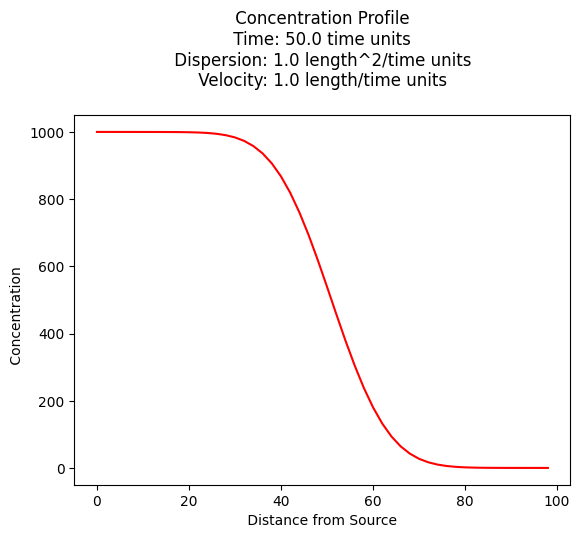

In [3]:
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 100.      # how far in X-direction to extend the plot
time  = 50.       # time since release
dispersion = 1.0 # dispersion coefficient
velocity = 1.0    # pore velocity
retardation = 1.0
decay = 0.00001
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = c1dadrd(c_source,x[i],time,dispersion,velocity,retardation,decay)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

In [4]:
#
# prototype decaying sourze zone function
#
def c1dadrdsrd(c_source,space,time,dispersion,velocity,retardation,decay,source_decay):
    from math import sqrt,erf,erfc,exp  # get special math functions
    dee = dispersion/retardation
    vee = velocity/retardation
    uuu = (vee**2 + 4.0*decay*dee)
    uuu = sqrt(uuu)
    arg1 = (space*(vee-uuu))/(2.0*dee)
    arg2 = (space - uuu*time)/(2.0*sqrt(dee*time))
    arg3 = (space*(vee+uuu))/(2.0*dee)
    arg4 = (space + uuu*time)/(2.0*sqrt(dee*time))
    temp0 = exp(-source_decay*time)
    temp1 = c_source/2.0
    temp2 = exp(arg1)
    temp3 = erfc(arg2)
    temp4 = exp(arg3)
    temp5 = erfc(arg4)
    
    c1dadrdsrd = temp0*temp1*(temp2*temp3+temp4*temp5)
    
    return c1dadrdsrd

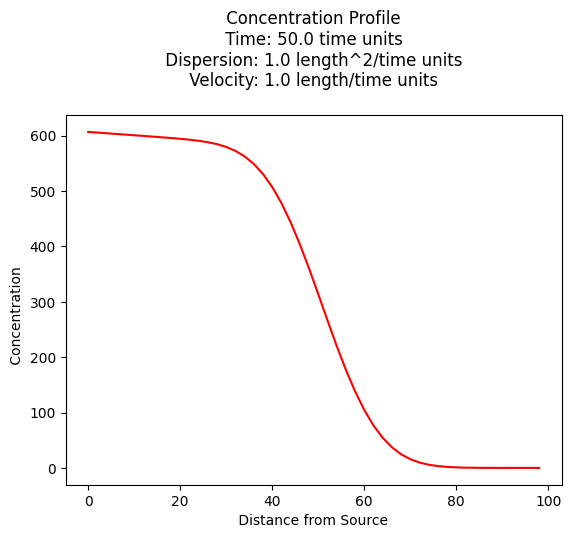

In [5]:
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 100.      # how far in X-direction to extend the plot
time  = 50.       # time since release
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
retardation = 1.0
decay = 0.001 # species decay rate
decay_s = 0.01 # source zone decay rate (e.g. washout rate)
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = c1dadrdsrd(c_source,x[i],time,dispersion,velocity,retardation,decay,decay_s)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

In [6]:
import math
from scipy.special import erf, erfc

def c2adrl(conc0, distx, disty, dispx, dispy, velocity, time, lenY, retardation, _lambda):
    vadj = velocity / retardation
    dispXadj = dispx / retardation
    dispYadj = dispy / retardation
    lambadj = _lambda / retardation

    uuu = math.sqrt(1.0 + 4.0*lambadj*dispXadj/vadj)
    ypp = (disty + 0.5*lenY) / (2*math.sqrt(dispYadj*distx))
    ymm = (disty - 0.5*lenY) / (2*math.sqrt(dispYadj*distx))

    arg1 = (distx - vadj*time*uuu) / (2*math.sqrt(dispXadj*vadj*time))
    arg2 = (distx / (2*dispXadj)) * (1 - uuu)

    term0 = conc0 / 4
    term1 = math.exp(arg2)
    term2 = erfc(arg1)
    term3 = (erf(ypp) - erf(ymm))

    c2adrl = term0 * term1 * term2 * term3
    return c2adrl

x=  100  y=  0  t=  100.0  C(x,y,t) =  49.956


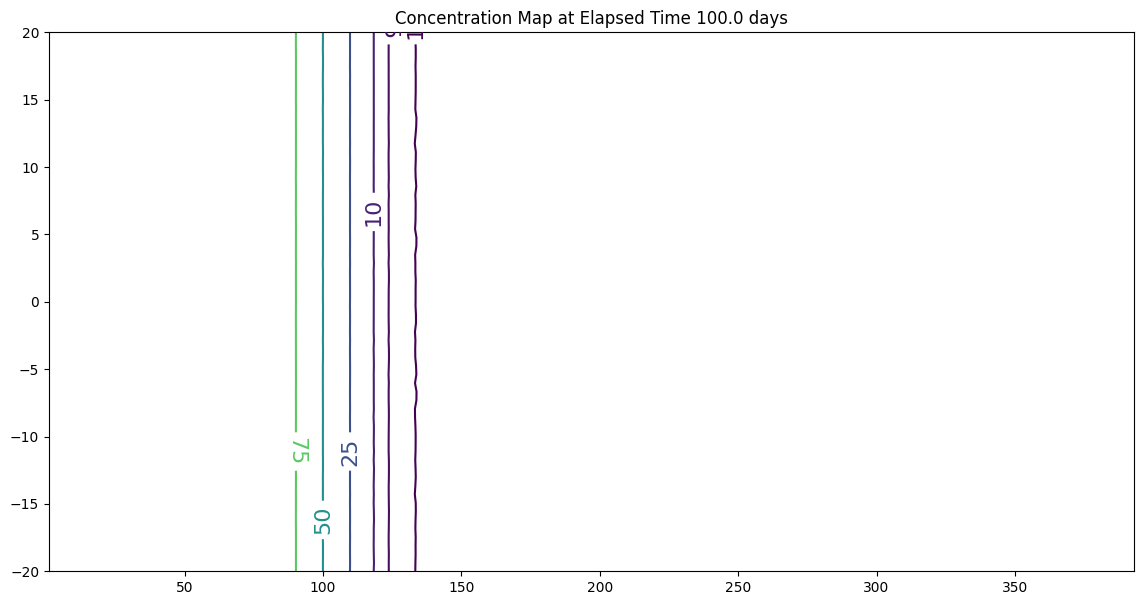

In [7]:
# inputs
c_initial = 100.0
xx = 100
yy = 0
Dx = 1.0
Dy = 0.1
V = 1.0
time = 100.0
Y = 1000.0
R = 1.0
LAM = 0.00001

output=c2adrl(c_initial, xx, yy, Dx, Dy, V, time, Y, R, LAM)
print("x= ",round(xx,2)," y= ",round(yy,2)," t= ",round(time,1)," C(x,y,t) = ",round(output,3))

# make a plot
x_max = 400
y_max = 20
# build a grid
nrows = 50   
deltax = (x_max)/nrows
x = []
x.append(1)
for i in range(nrows):
    if x[i] == 0.0:
        x[i] = 0.00001
    x.append(x[i]+deltax)

ncols = 50   
deltay = (y_max*2)/(ncols-1)
y = []
y.append(-y_max)
for i in range(1,ncols):
    if y[i-1] == 0.0:
        y[i-1] = 0.00001
    y.append(y[i-1]+deltay)
    
#y

#y = [i*deltay for i in range(how_many_points)] # constructor notation
#y[0]=0.001
ccc = [[0 for i in range(nrows)] for j in range(ncols)]

for jcol in range(ncols):
    for irow in range(nrows):
        ccc[irow][jcol] = c2adrl(c_initial, x[irow], y[jcol], Dx, Dy, V, time, Y, R, LAM)
        
#y

my_xyz = [] # empty list
count=0
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([ x[irow],y[jcol],ccc[irow][jcol] ])
       # print(count)
        count=count+1
        
#print(len(my_xyz))

import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
#print(min(coord_x), max(coord_x)) # activate to examine the dataframe
#print(min(coord_y), max(coord_y))
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 64)
lat = numpy.linspace(min(coord_y), max(coord_y), 64)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = [1,5,10,25,50,75,100])
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Concentration Map at Elapsed Time '+ str(round(time,1))+' days');
